In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

#Exercise 1

In [ ]:
# set up constants
dx = 0.05
beta = 1.0
x_max = 2.0
y_max = 2.0
tolerance = 1e-3
max_iterations = 1000

# create grid
x_values = np.arange(dx, x_max + dx, dx)
y_values = np.arange(dx, y_max + dx, dx)
X, Y = np.meshgrid(x_values, y_values)

# define J and J0 at each grid point
J  = 1 / Y
J0 = X / Y

# define the integrands of RS mean field equations
def integrand_q(z, beta, J, J0, m, q):
    return np.exp(-z**2 / 2) * (1 / np.cosh(beta * J * np.sqrt(q) * z + beta * J0 * m)**2)

def integrand_m(z, beta, J, J0, m, q):
    return np.exp(-z**2 / 2) * np.tanh(beta * J * np.sqrt(q) * z + beta * J0 * m)

# initialial guesses for q and m (range is (0,1))
q = np.ones_like(X) * 0.5
m = np.ones_like(X) * 0.5

# empty arrays to store updates values
q_new = np.zeros_like(q)
m_new = np.zeros_like(m)

# start fixed-point iteration
for iteration in range(max_iterations):

    for i in range(len(x_values)):
        for j in range(len(y_values)):
            # compute the integrals numerically
            integral_q, _ = quad(integrand_q, -np.inf, np.inf, args=(beta, J[j, i], J0[j, i], m[j, i], q[j, i]))
            integral_m, _ = quad(integrand_m, -np.inf, np.inf, args=(beta, J[j, i], J0[j, i], m[j, i], q[j, i]))

            # update q and m
            q_new[j, i] = 1 - (1/np.sqrt(2 * np.pi)) * integral_q
            m_new[j, i] = (1/np.sqrt(2 * np.pi)) * integral_m

    # check for convergence
    if np.max(np.abs(q - q_new)) < tolerance and np.max(np.abs(m - m_new)) < tolerance:
        print(f"Converged after {iteration} iterations")
        break

    q, m = q_new.copy(), m_new.copy()
else:
    print("Did not converge within the maximum number of iterations")

<ipython-input-78-cc8bf8028c60>:20: RuntimeWarning: overflow encountered in cosh
  return np.exp(-z**2 / 2) * (1 / np.cosh(beta * J * np.sqrt(q) * z + beta * J0 * m)**2)
<ipython-input-78-cc8bf8028c60>:20: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(-z**2 / 2) * (1 / np.cosh(beta * J * np.sqrt(q) * z + beta * J0 * m)**2)


Converged after 81 iterations


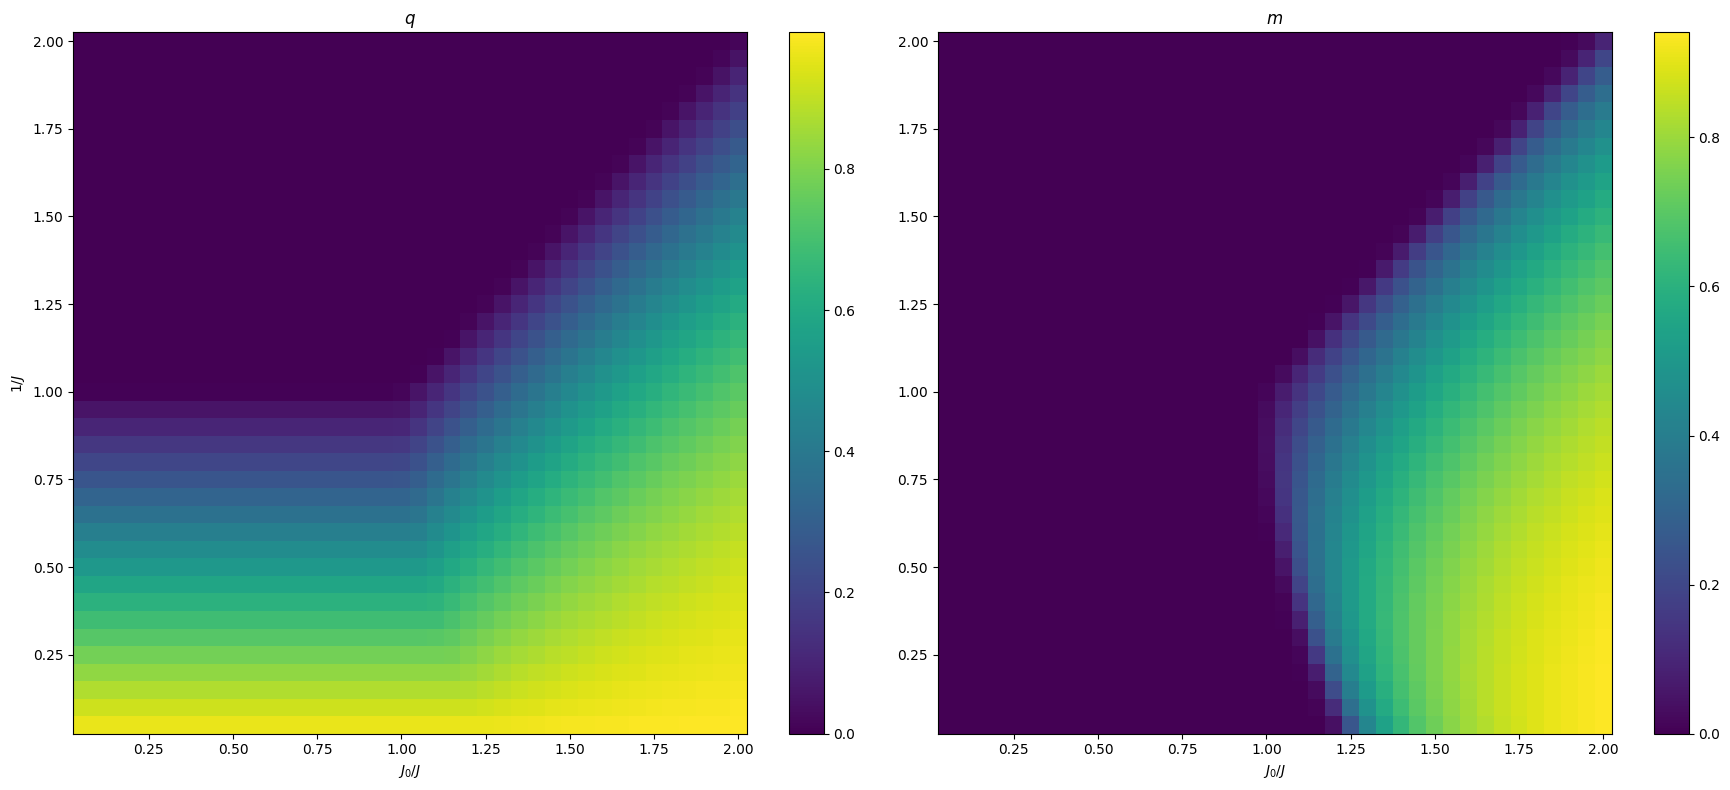

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# plot q
cp = ax[0].pcolormesh(X, Y, q, cmap='viridis')
fig.colorbar(cp, ax=ax[0])
ax[0].set_title('$q$')
ax[0].set_xlabel('$J_0/J$')
ax[0].set_ylabel('$1/J$')

# plot m
cp = ax[1].pcolormesh(X, Y, m, cmap='viridis')
fig.colorbar(cp, ax=ax[1])
ax[1].set_title('$m$')
ax[1].set_xlabel('$J_0/J$')

plt.tight_layout()
plt.show()

# Exercise 2

##a.)

##b.)

In [ ]:
# set up constants
dx = 0.05
beta = 1.0
x_max = 2.0
y_max = 2.0
tolerance = 1e-5
max_iterations = 100

# create grid
x_values = np.arange(dx, x_max + dx, dx)
y_values = np.arange(dx, y_max + dx, dx)
X, Y = np.meshgrid(x_values, y_values)

# define J and J0 at each grid point
J  = 1 / Y
J0 = X / Y

def integrand_H(z, beta, J, J0, m, q):
    f_z = beta * J0 * m + beta * J * np.sqrt(q) * z #trick to avoid numerical overflow from assignment
    return np.exp(-z**2 / 2) * (np.abs(f_z) + np.log(1 + np.exp(-2 * np.abs(f_z))))

# initialial guesses for H
H = np.ones_like(X) * 0.1

# empty arrays to store updates values
H_new = np.zeros_like(H)

# start fixed-point iteration
for iteration in range(max_iterations):
    for i in range(len(x_values)):
        for j in range(len(y_values)):
            # compute the integrals numerically
            integral_H, _ = quad(integrand_H, -np.inf, np.inf, args=(beta, J[j, i], J0[j, i], m[j, i], q[j, i]))

            # update H
            H_new[j, i] = -beta**2 * J[j,i]**2 * (q[j,i] - 1)**2 / 4 + (1 / (np.sqrt(2 * np.pi))) * integral_H - beta * J0[j,i] * m[j,i]**2 - beta**2 * J[j,i]**2 * q[j,i] * (1 - q[j,i])

    # check for convergence
    if np.max(np.abs(H - H_new)) < tolerance:
        print(f"Converged after {iteration} iterations")
        break

    H = H_new.copy()
else:
    print("Did not converge within the maximum number of iterations")

Converged after 1 iterations


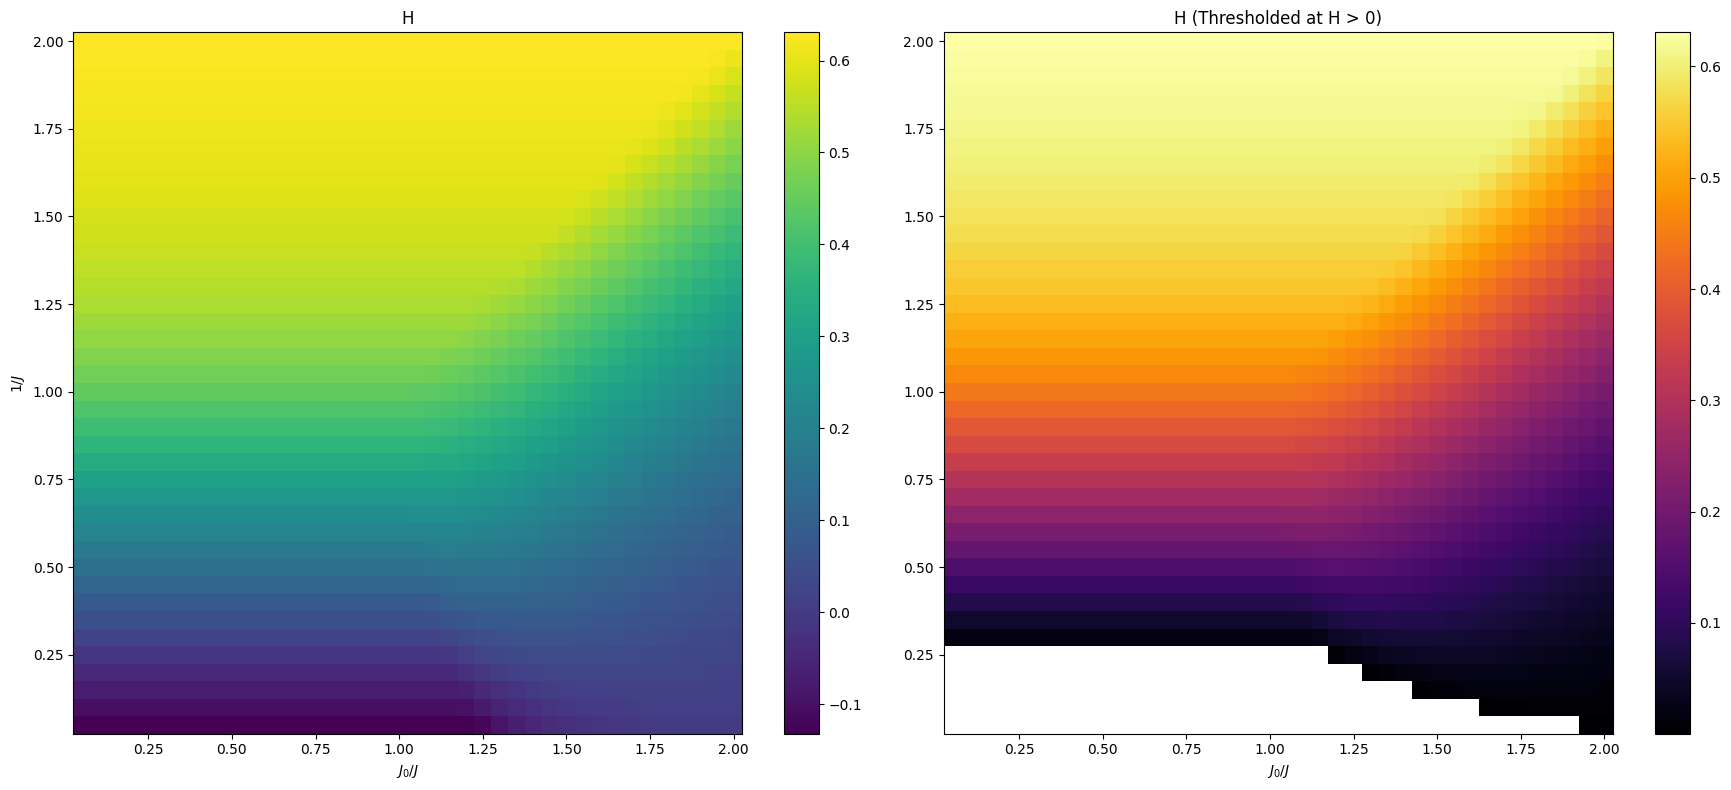

In [ ]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# plot H normally
cp = ax[0].pcolormesh(X, Y, H, cmap='viridis')
fig.colorbar(cp, ax=ax[0])
ax[0].set_title('H')
ax[0].set_xlabel('$J_0/J$')
ax[0].set_ylabel('$1/J$')

# plot H with threshold
H_thresholded = np.ma.masked_where(H <= 0, H)
cp = ax[1].pcolormesh(X, Y, H_thresholded, cmap='inferno')
fig.colorbar(cp, ax=ax[1])
ax[1].set_title('H (Thresholded at H > 0)')
ax[1].set_xlabel('$J_0/J$')

plt.tight_layout()
plt.show()